# Imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Fetch

In [2]:
def process_cell(data):
    if '\n' in data:
        data = data.replace('\n', '')
    return float(data)

def read_from_files(path, file_list):
    y=[]
    X=[]
    for file in file_list:
        with open(path+'/'+file) as f:
            read_lines = f.readlines()
            for i in range(len(read_lines)):
                line = list(map(process_cell, read_lines[i].split(',')))
                X.append(line[1:])
                y.append(int(line[0]))
            f.close()
    return X,y
    
def get_decade_year(years, is_decade_onehot=True):
    #Decades: 0s (2000s), 10s (2010s), 20s (1920s), 30s, 40s, 50s, 60s, 70s, 80s, 90s - 10d onehot
    #Years 0-9 (not onehot encoded)
    rez_y = []
    rez_d = []
    year_enc = {}
    for i in range(10):
        if is_decade_onehot:
            year_enc[i] = [0,0,0,0,0,0,0,0,0,0]
            year_enc[i][i] = 1
        else:
            year_enc[i] = i
    for y in years:
        dec_year = y % 100
        decade = dec_year // 10
        year = dec_year % 10
        rez_y.append(year)
        rez_d.append(year_enc[decade])
    return rez_d, rez_y

In [3]:
files = ['data_1.txt', 'data_2.txt', 'data_3.txt', 'data_4.txt', 'data_5.txt']
path = './data'
X, y = read_from_files(path, files)

In [4]:
train_len = 463715
X_train, y_train = np.array(X[:train_len]), np.array(y[:train_len])
X_test, y_test = np.array(X[train_len:]), np.array(y[train_len:])

In [5]:
y_train_decade, y_train_year = get_decade_year(y_train)
y_test_decade, y_test_year = get_decade_year(y_train)

In [24]:
#Scale
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Analysis

In [26]:
def plot_hist(data, axes, i, j, bins, color,title = None):
    m = np.mean(data)
    v = np.var(data)
    sns.histplot(data = data, bins = bins, ax = axes[i,j], color=color, legend=False)
    axes[i,j].axvline(m, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {m:.2f}')
    axes[i,j].axvline(m - np.sqrt(v), color='green', linestyle='dashed', linewidth=2, label=f'-1 SD')
    axes[i,j].axvline(m + np.sqrt(v), color='green', linestyle='dashed', linewidth=2, label=f'+1 SD')

    if not title is None:
        axes[i,j].set_title(title)

def plot_scatter(X, y, axes, i, j, color, title = None):
    sns.scatterplot(x = X, y = y, ax = axes[i,j], color = color, legend = False, alpha=0.2)
    if not title is None:
        axes[i,j].set_title(title)

def plot_attribute_distribution(data):
    X_t = np.transpose(data)
    
    w = int(len(X_t)**0.5)
    h = len(X_t)//w
    if len(X_t)%w !=0:
        h+=1
    _, axes = plt.subplots(h, w, figsize = (30,30))
    for i in range(h):
        for j in range(w):
            ind = i*w + j
            plot_hist(X_t[ind], axes, i, j, 50, 'steelblue')
    plt.tight_layout()
    plt.show()

def plot_target_dependance(data, target, start, end):
    X_t = np.transpose(data)
    size = min(end-start, len(X_t))
    w = int(size**0.5)
    h = size//w
    if size%w !=0:
        h+=1
    _, axes = plt.subplots(h, w, figsize = (10,10))
    for i in range(h):
        for j in range(w):
            ind = start + i * w + j
            if ind < start or ind>=end:
                continue
            plot_scatter(X_t[ind], target, axes, i, j, 'steelblue')
    plt.tight_layout()
    plt.show()


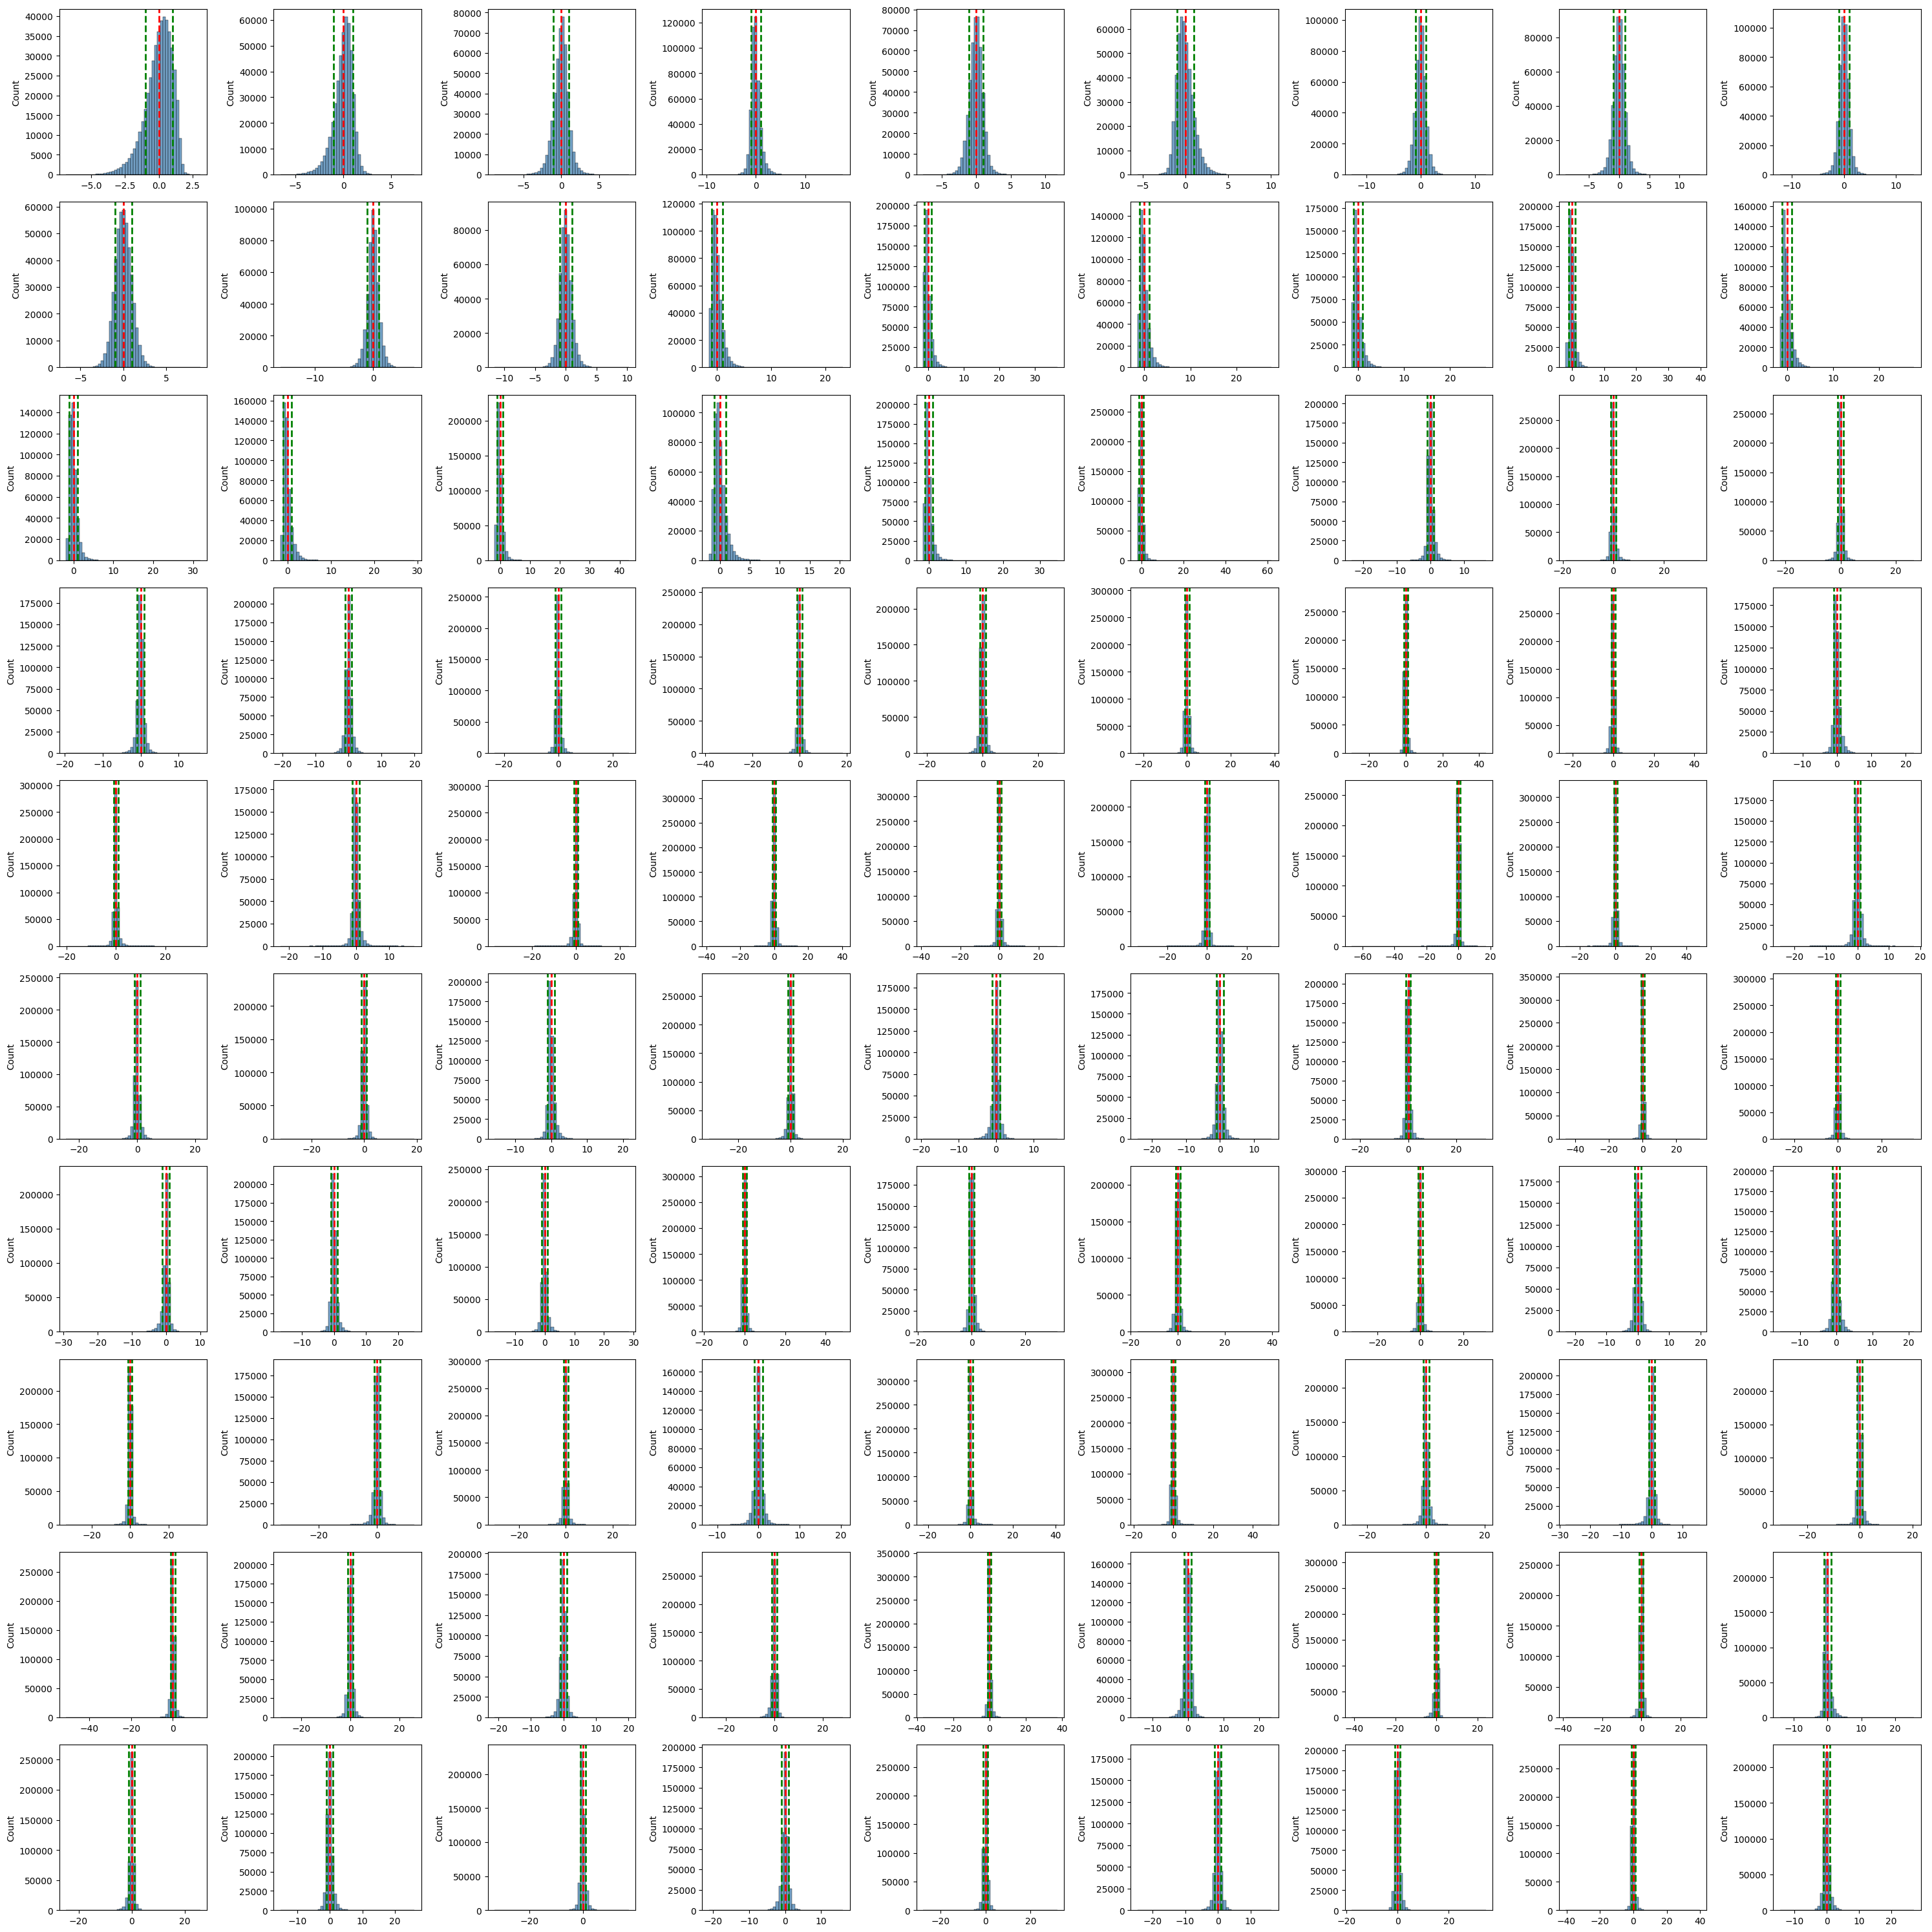

In [55]:
plot_attribute_distribution(X_train)

In [38]:
decade, _ = get_decade_year(y_train, is_decade_onehot=False)
decade = np.array(decade)

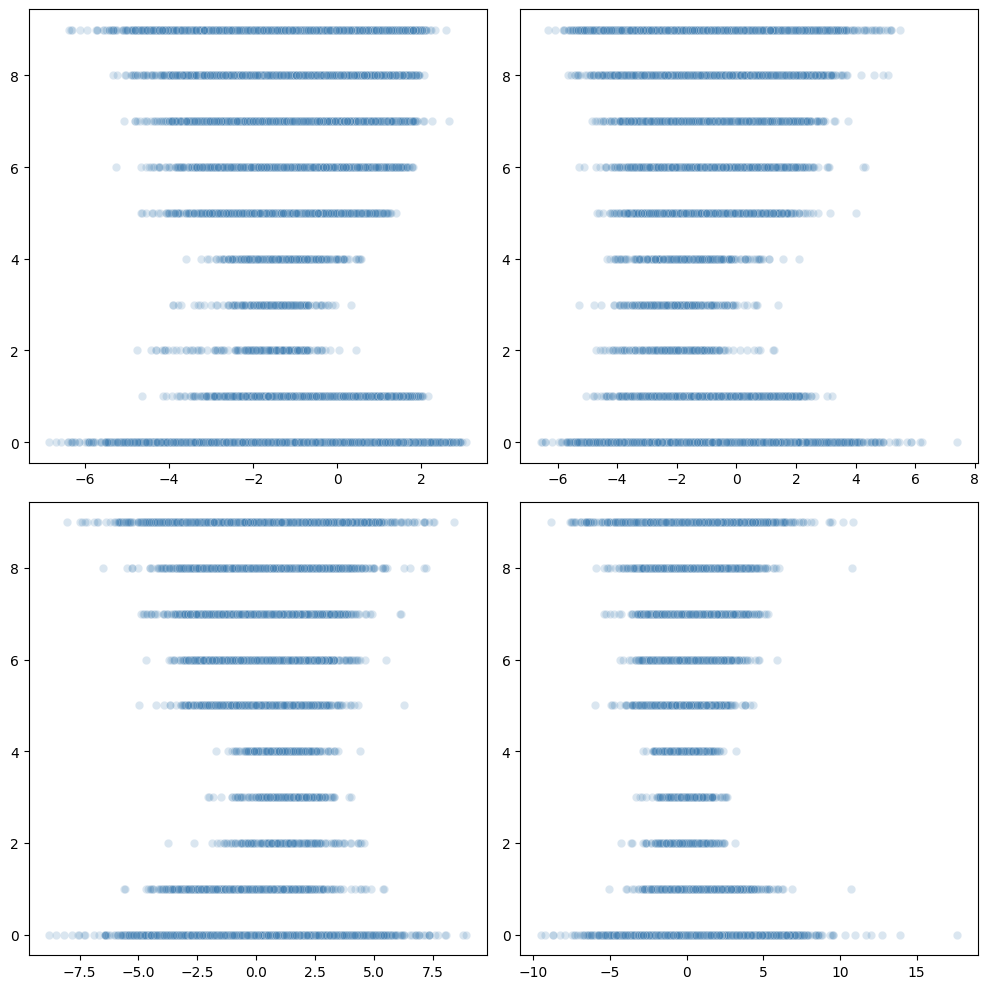

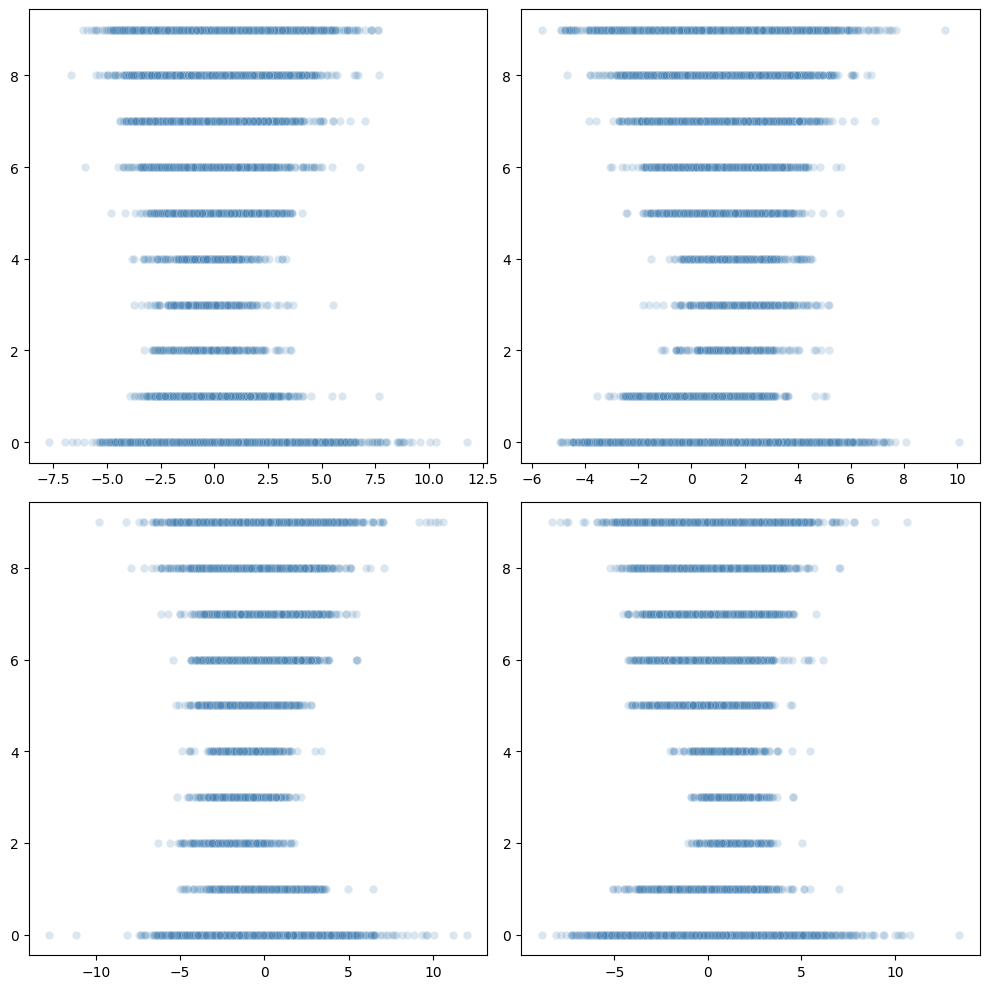

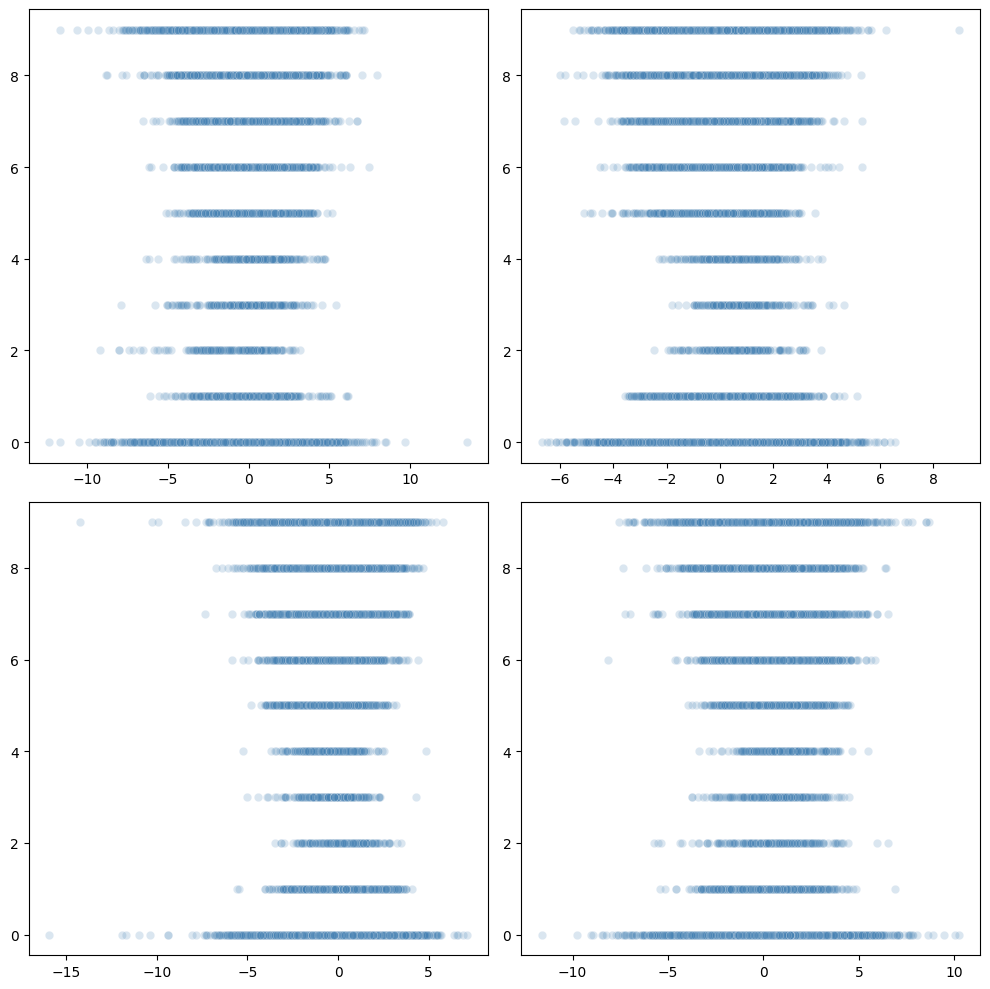

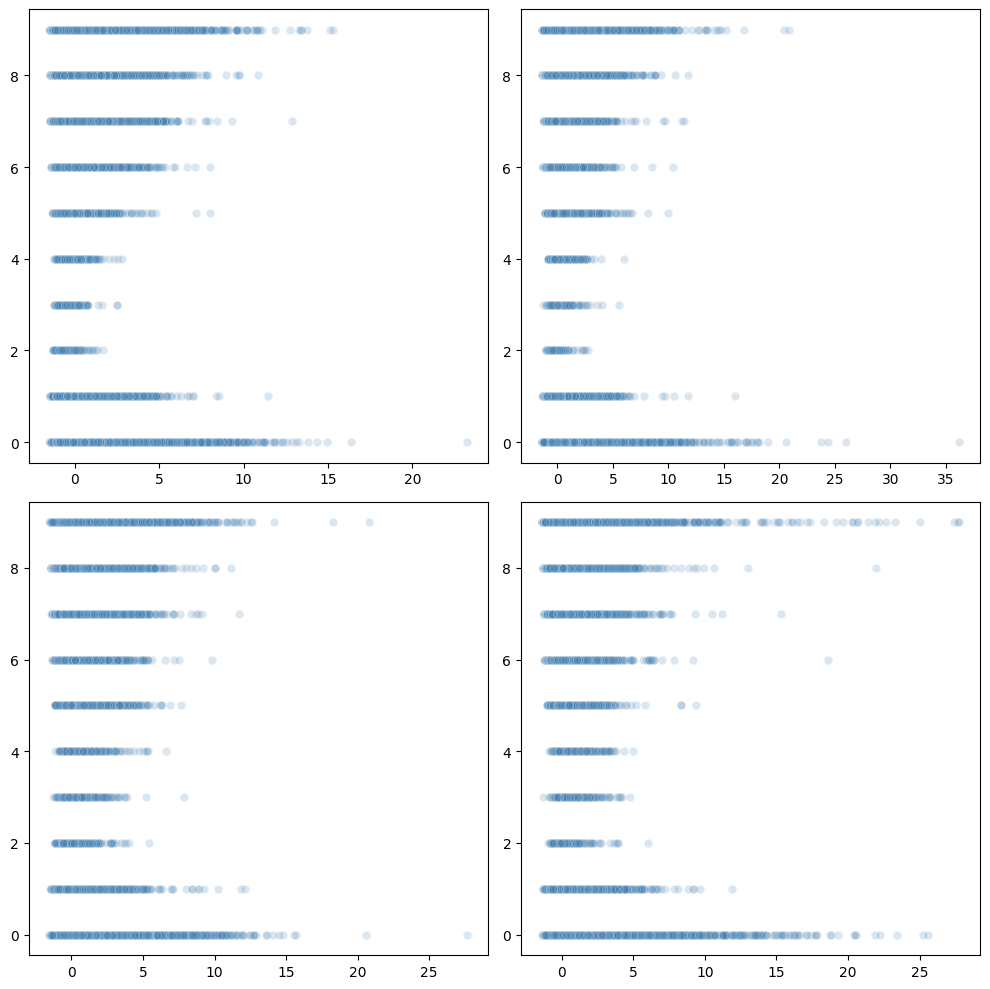

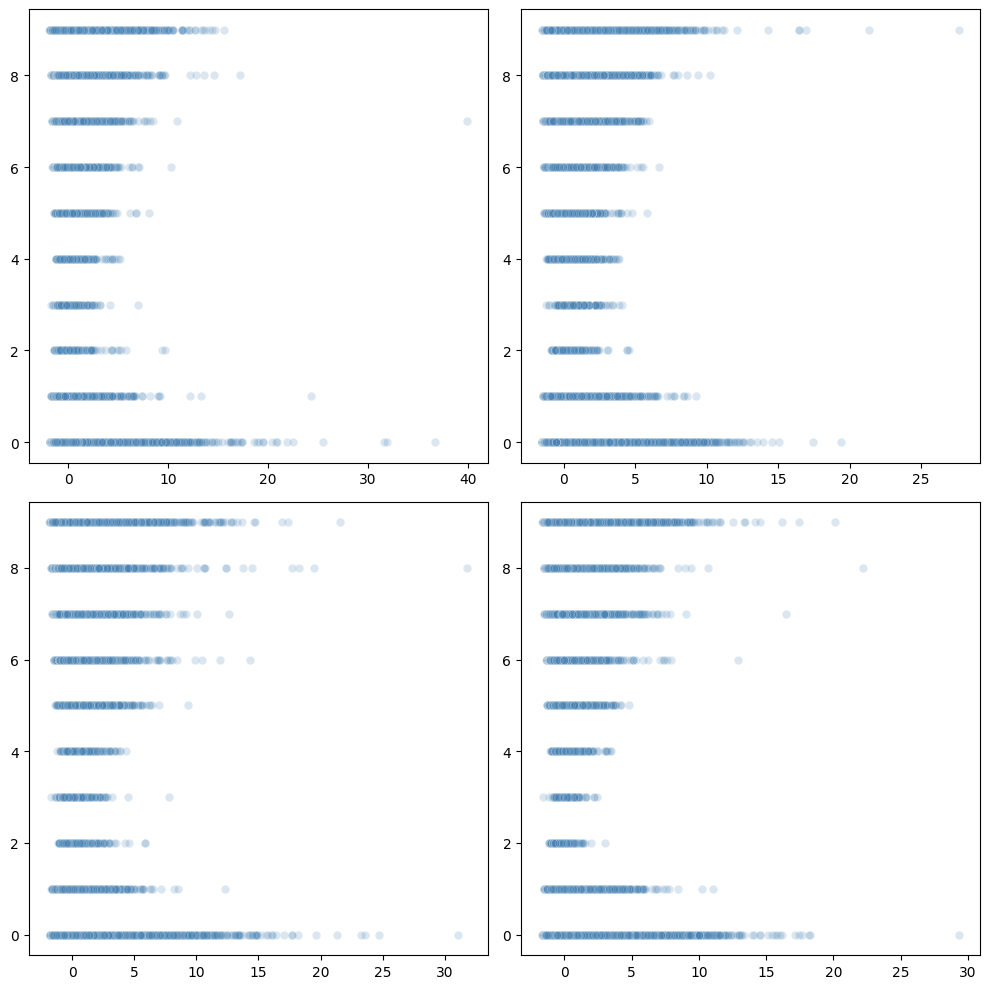

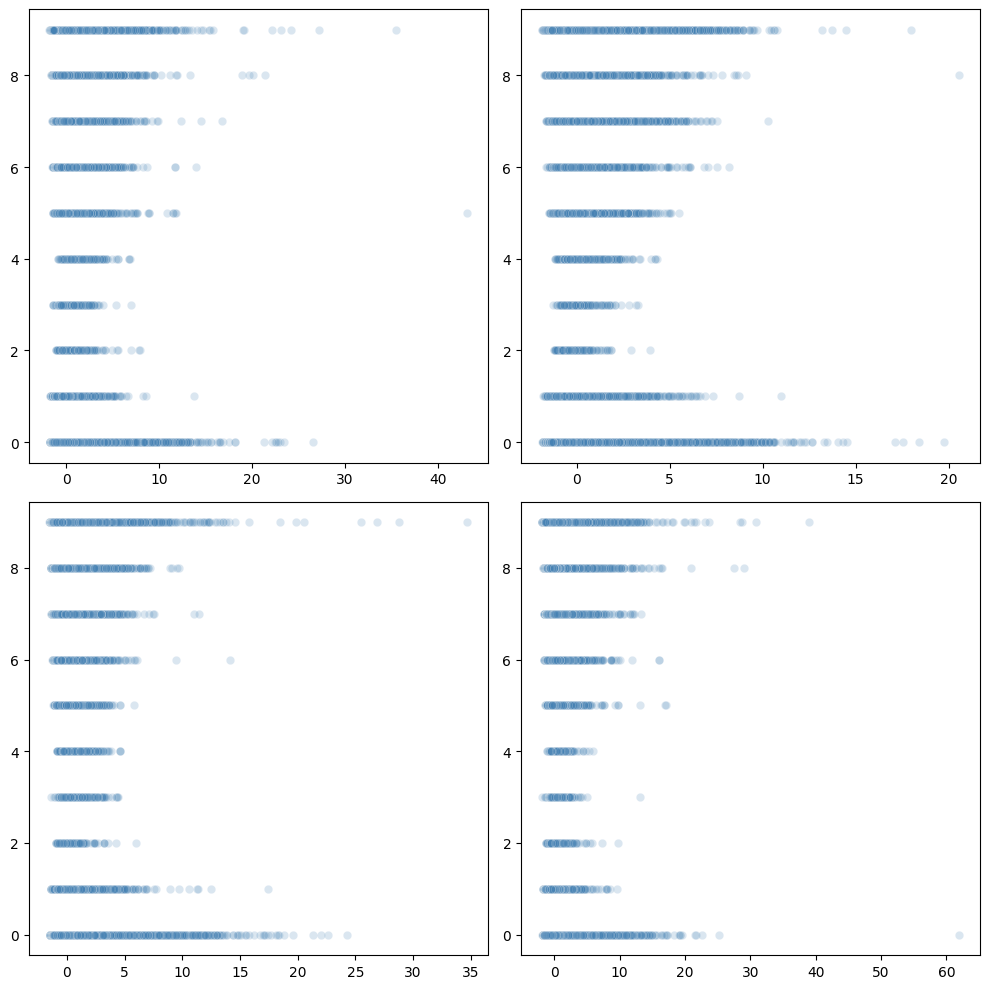

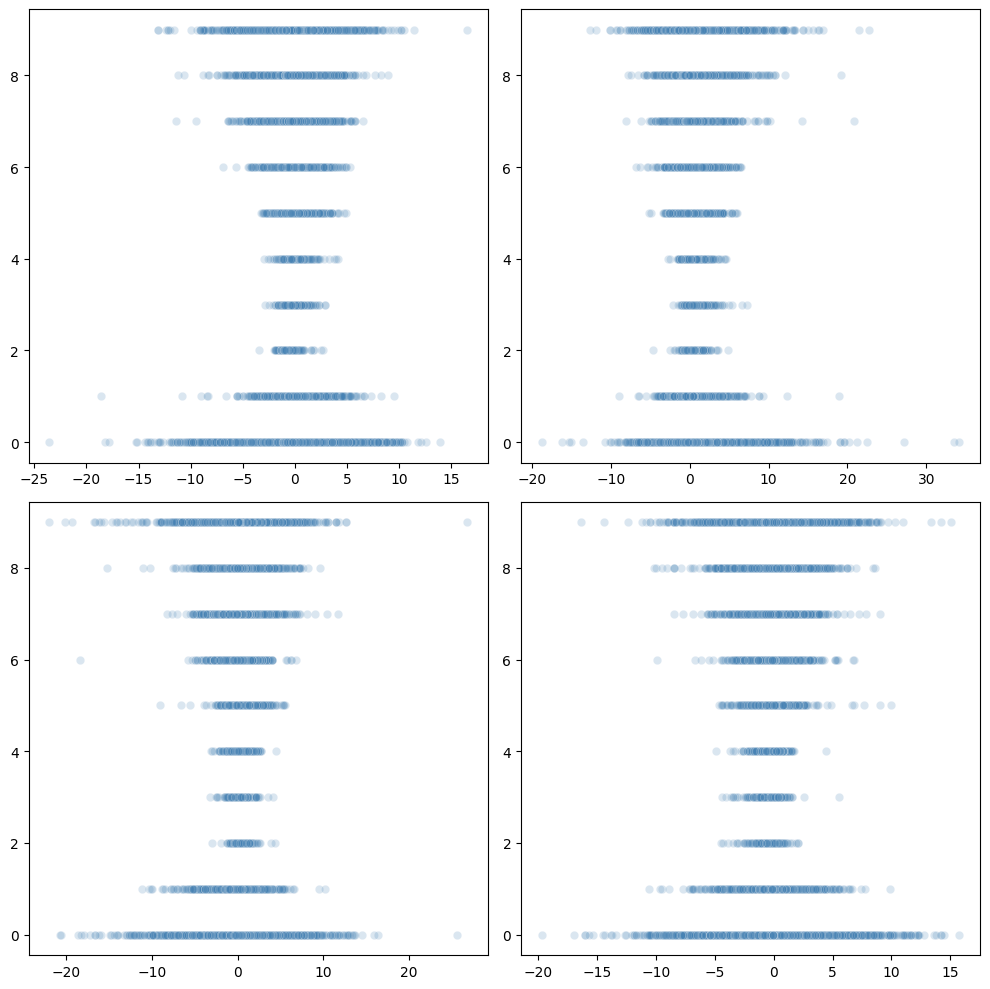

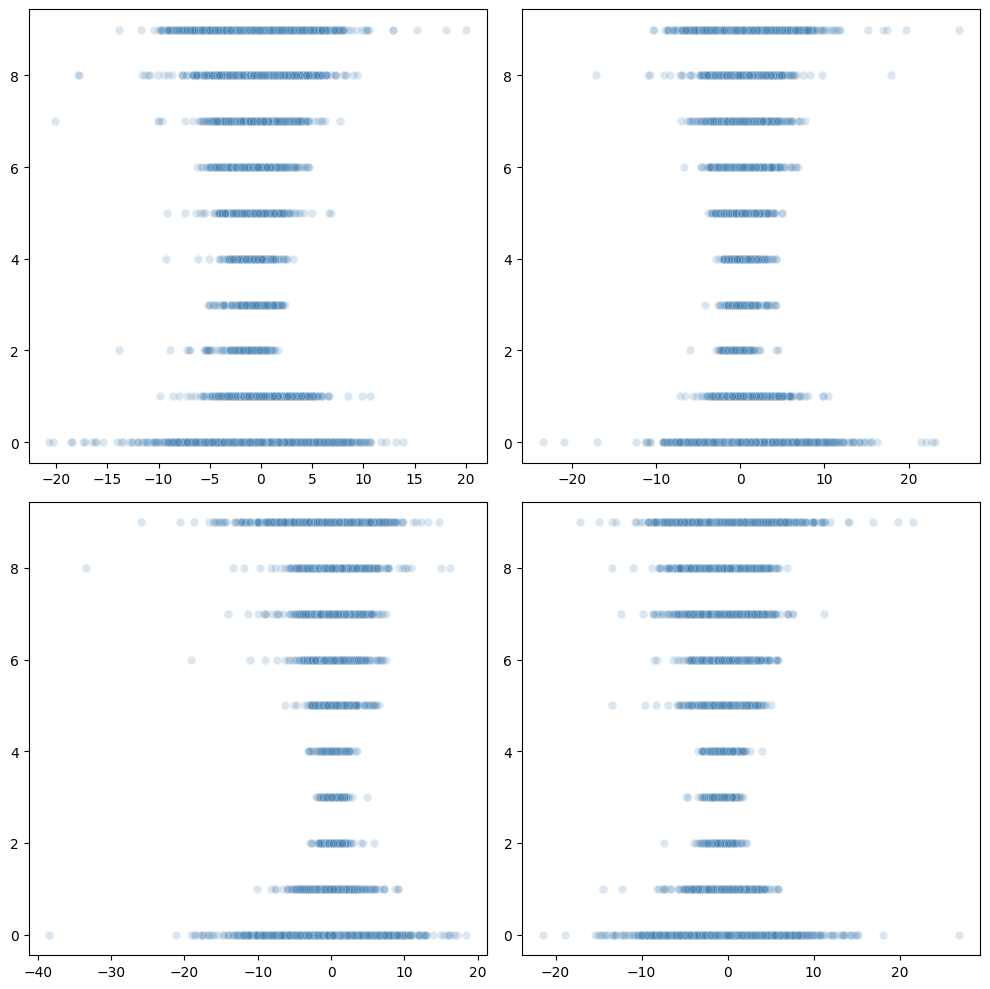

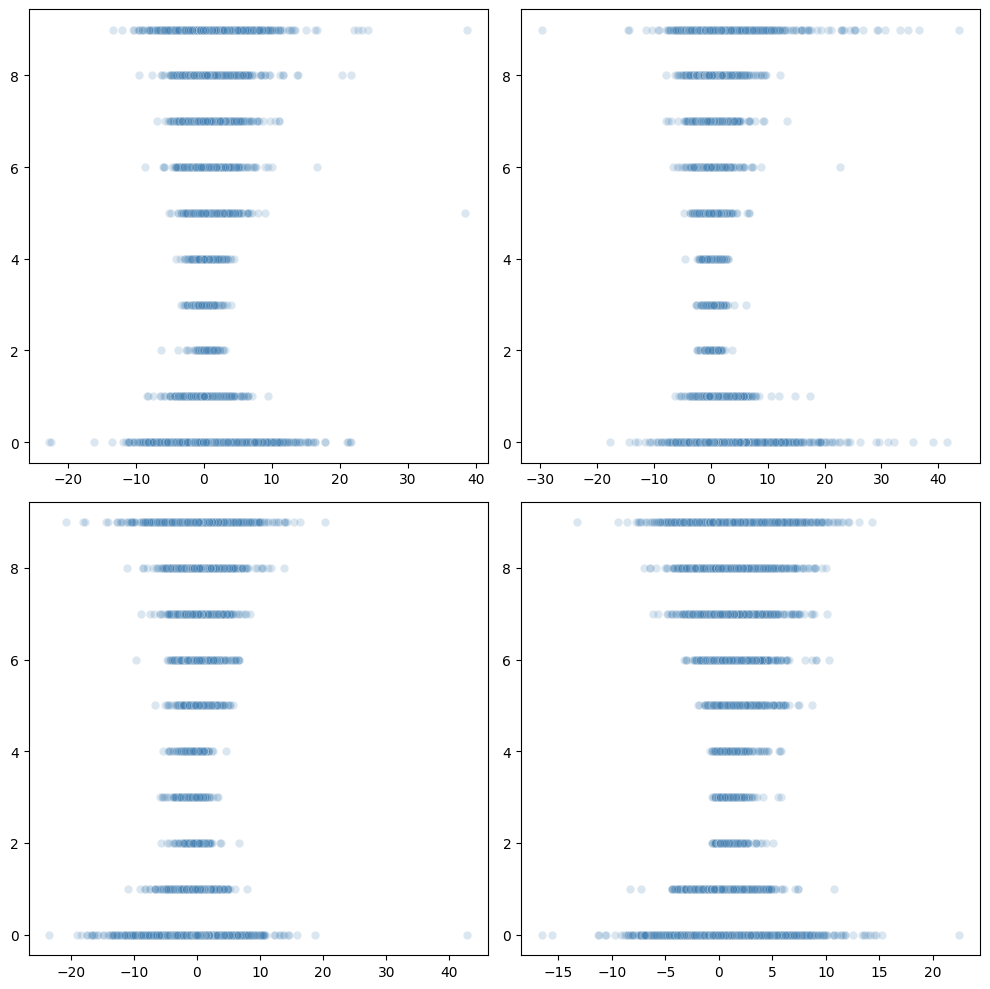

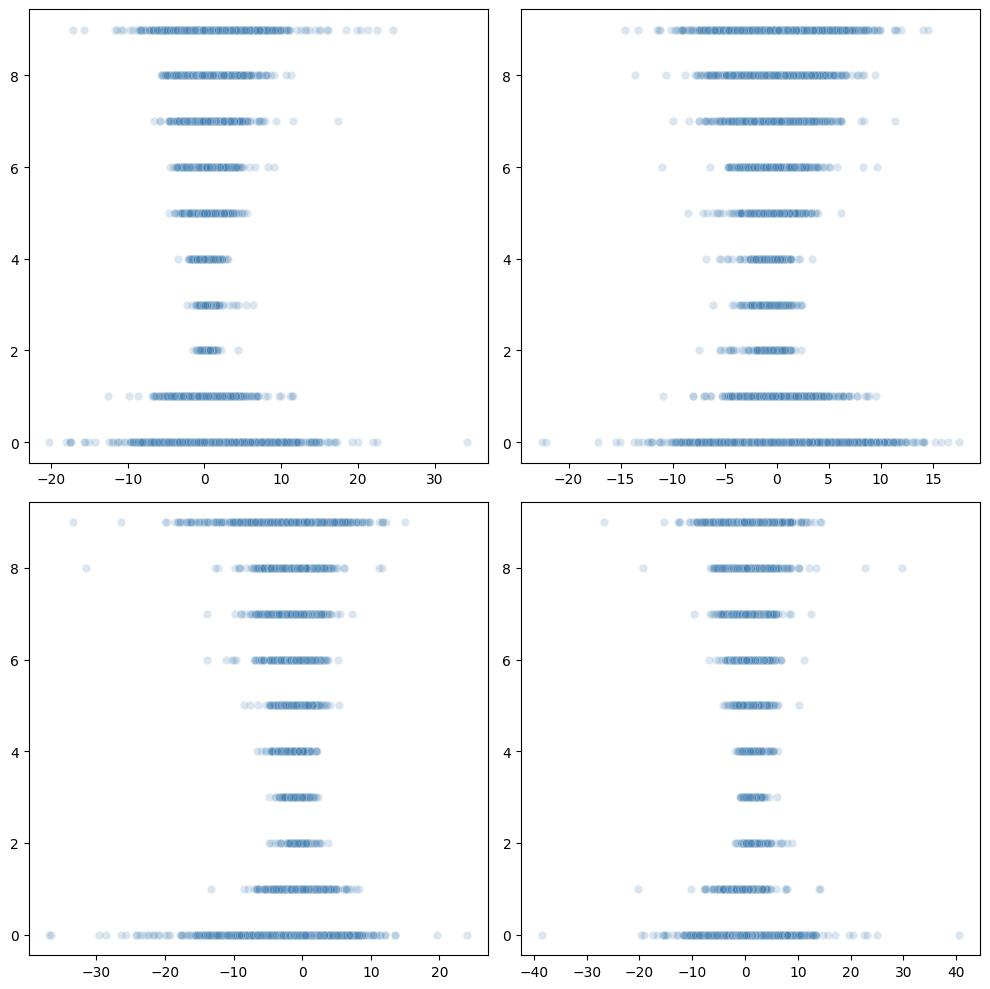

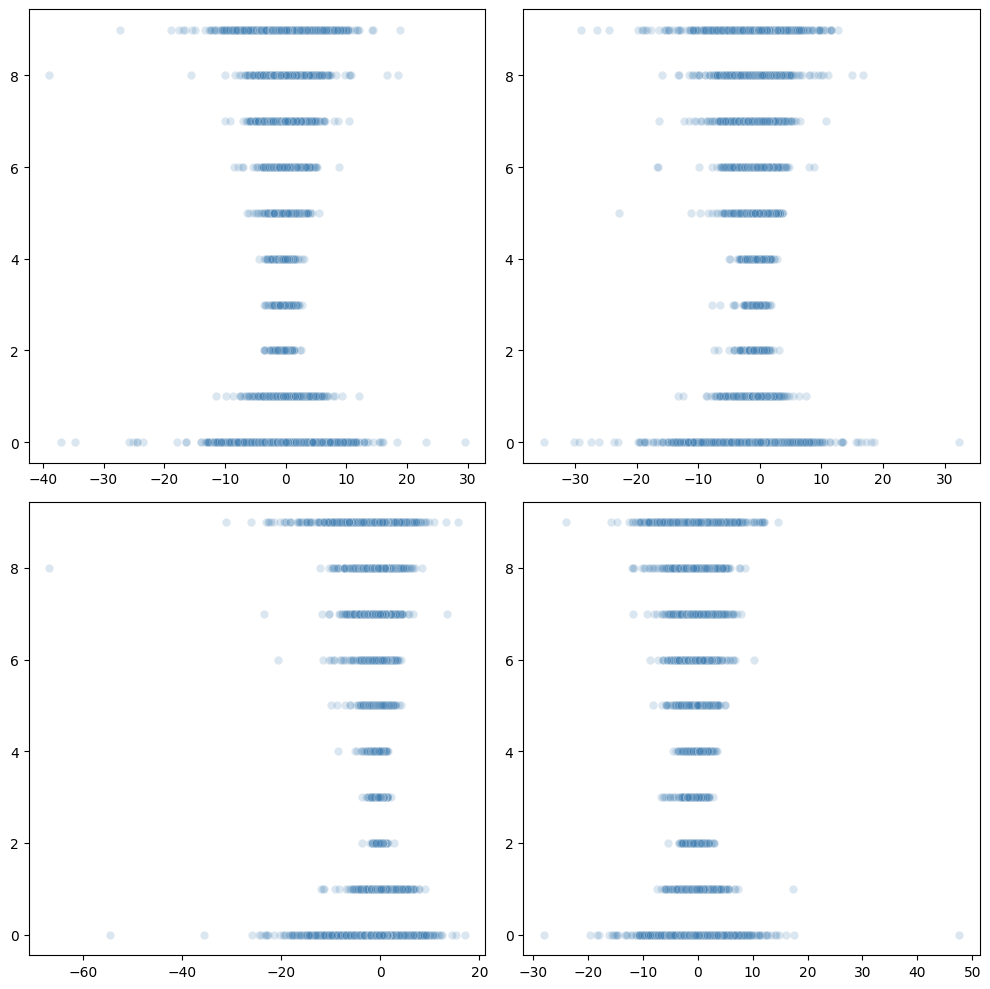

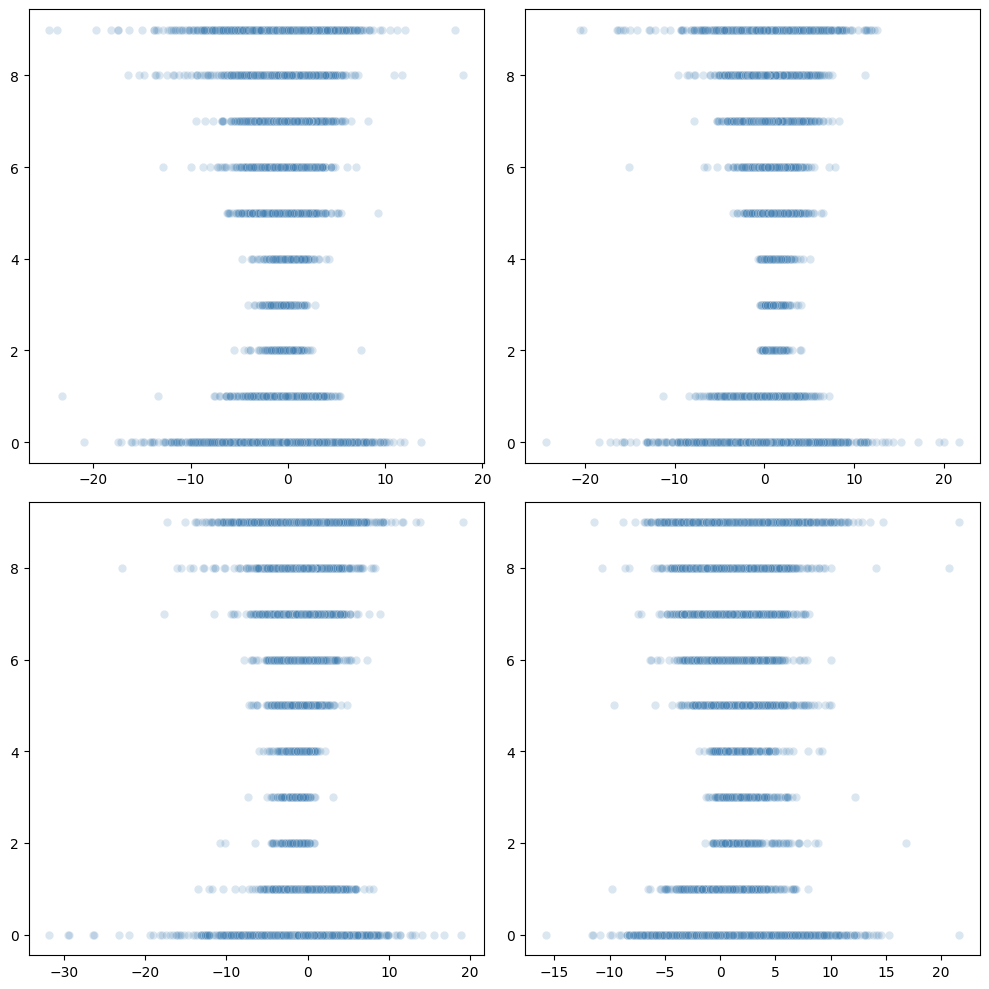

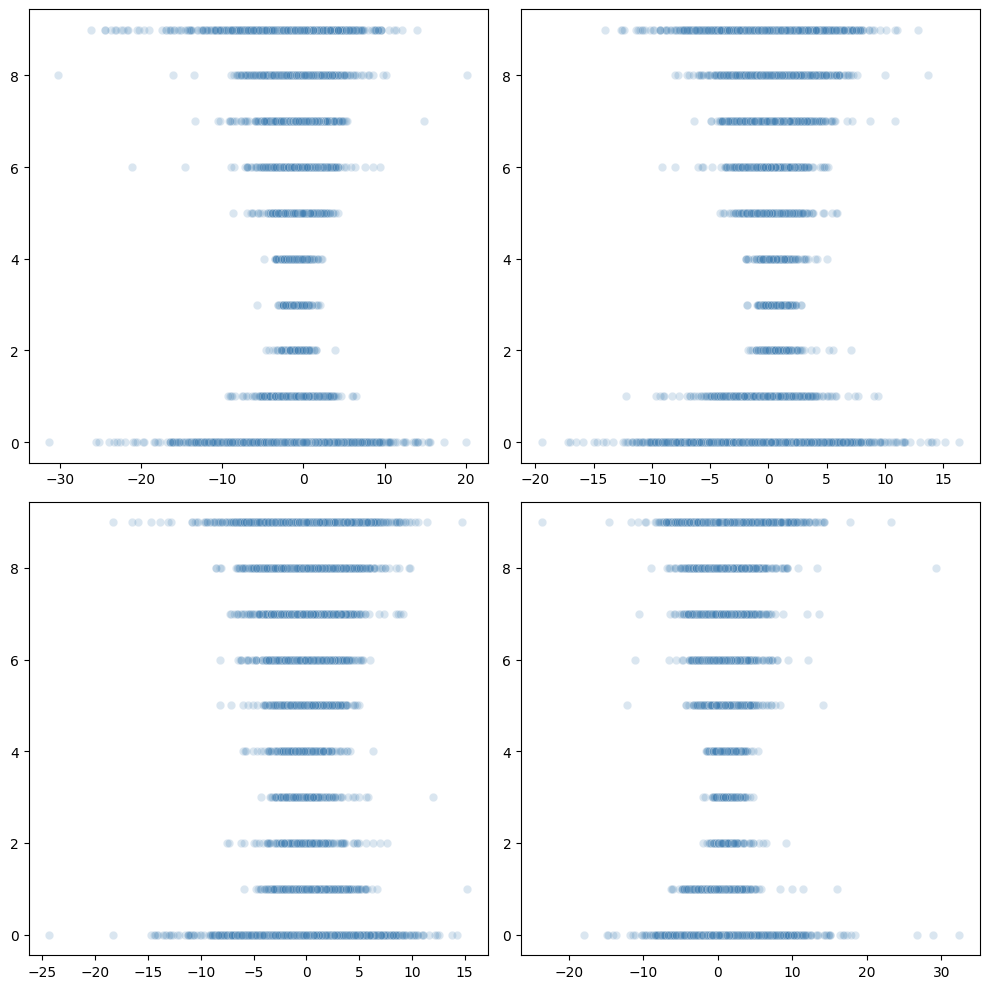

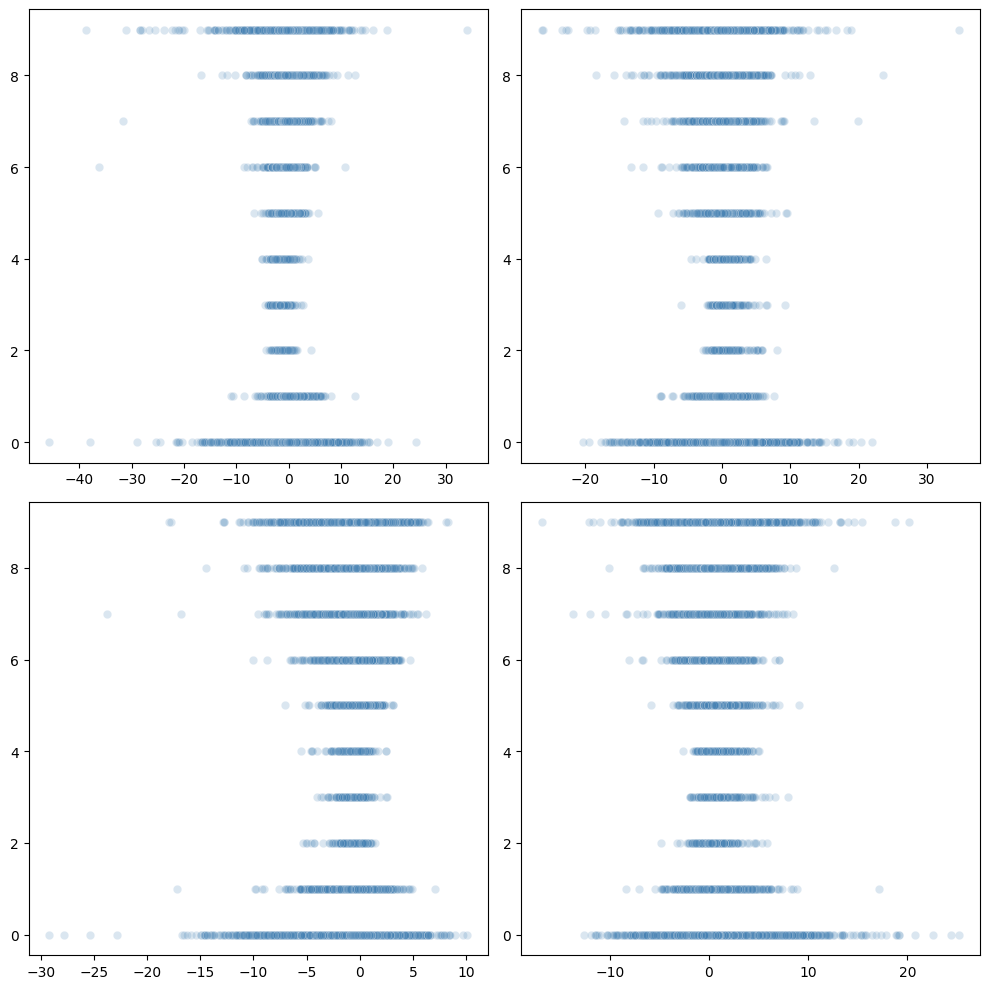

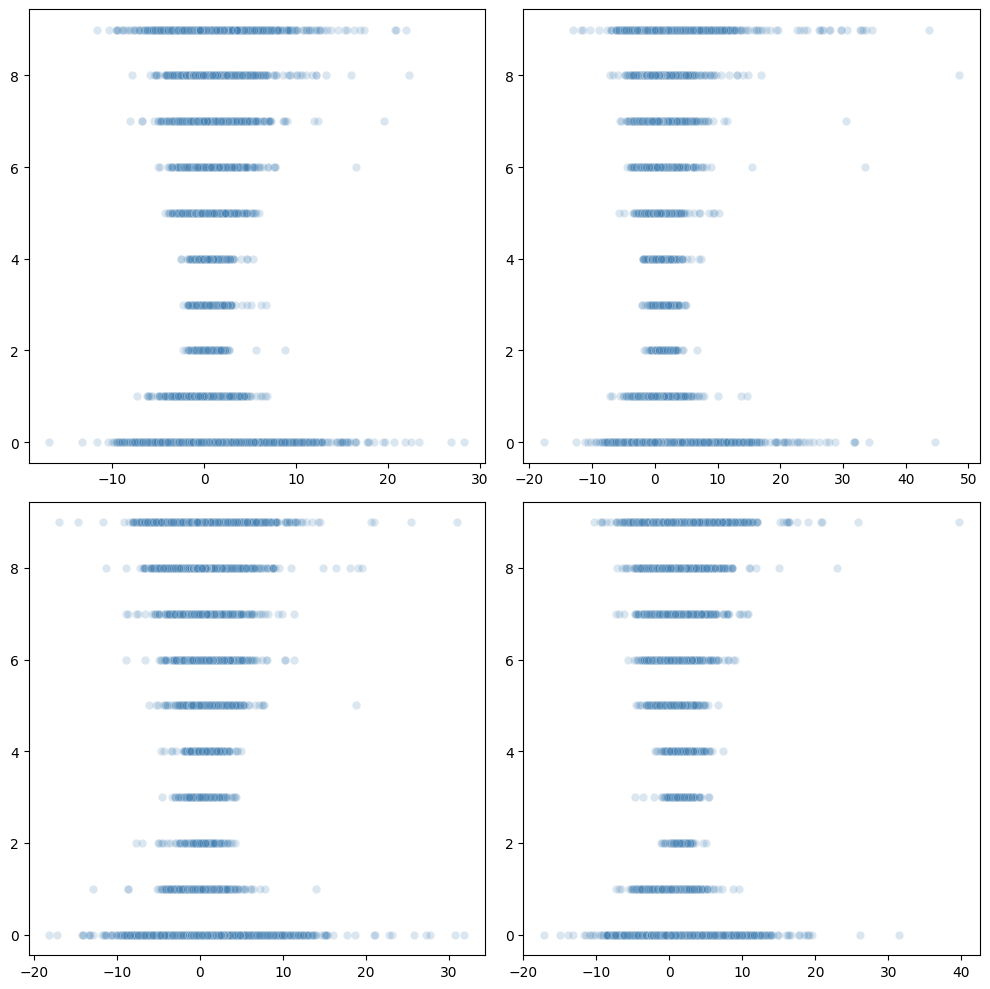

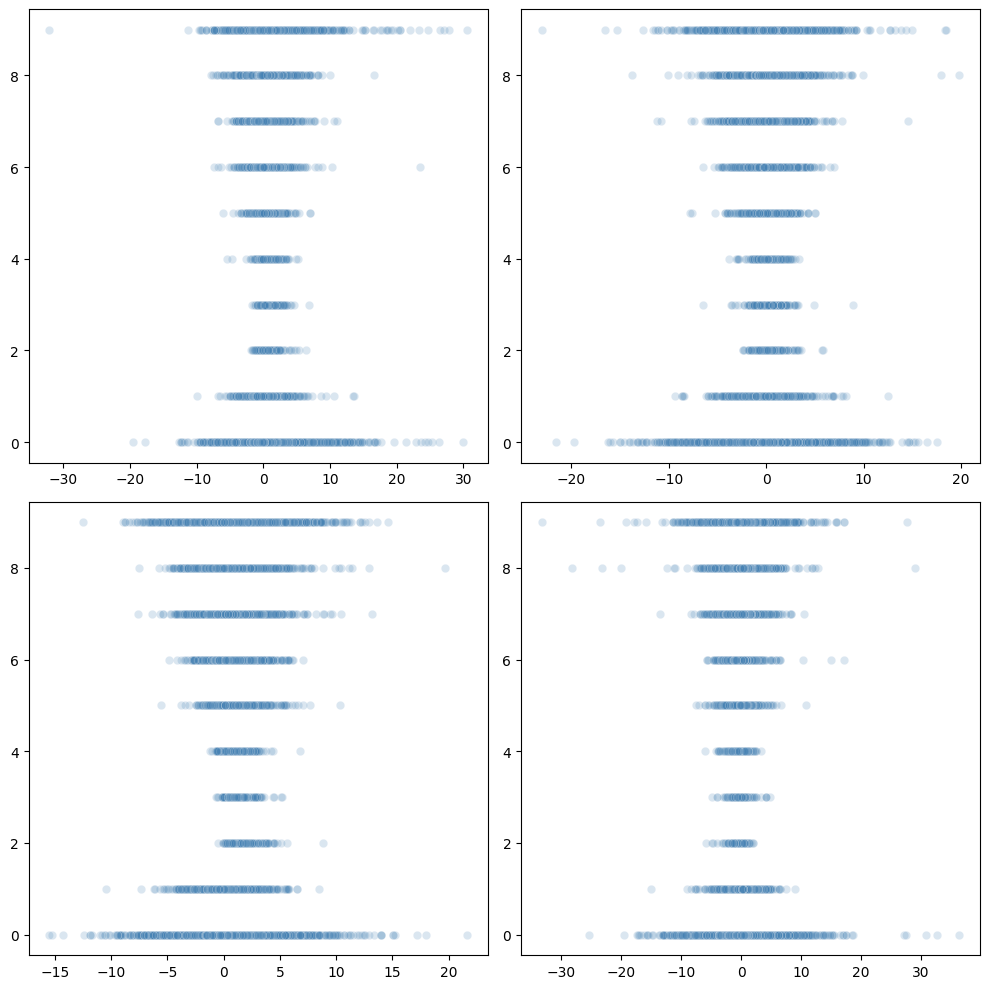

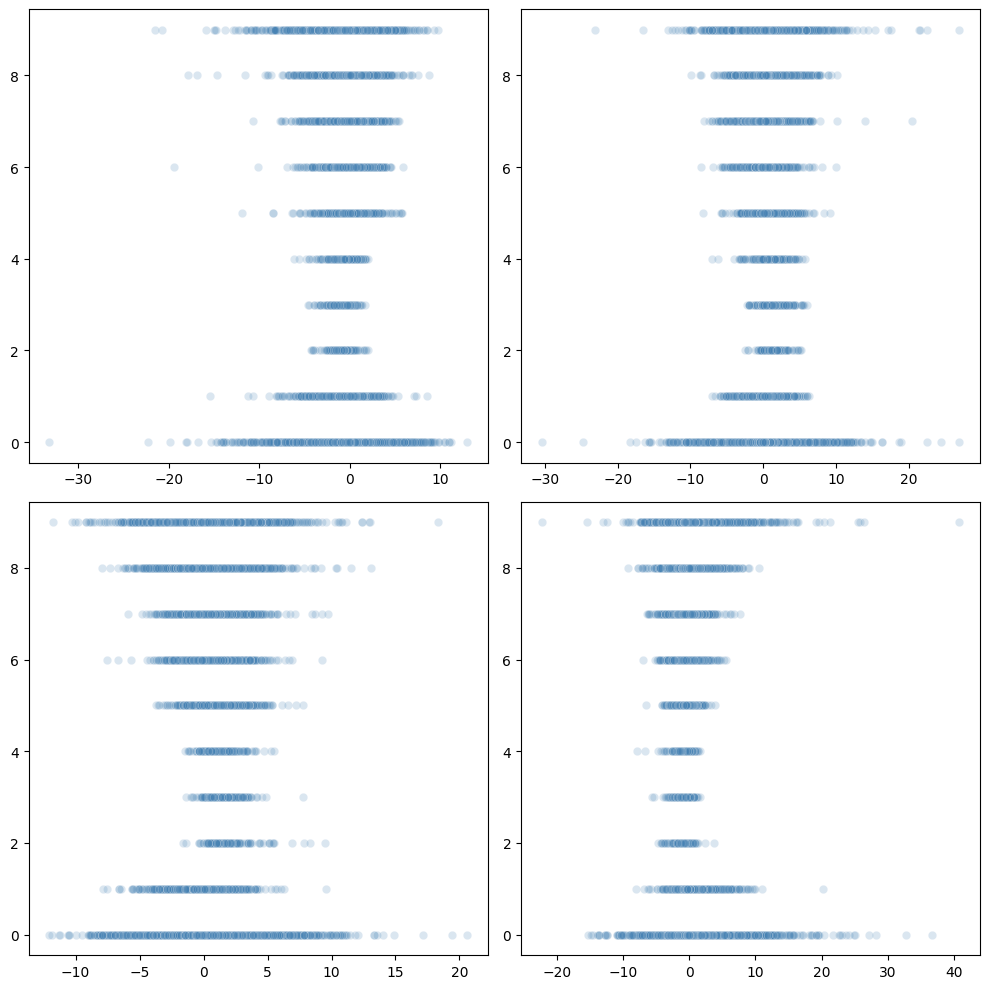

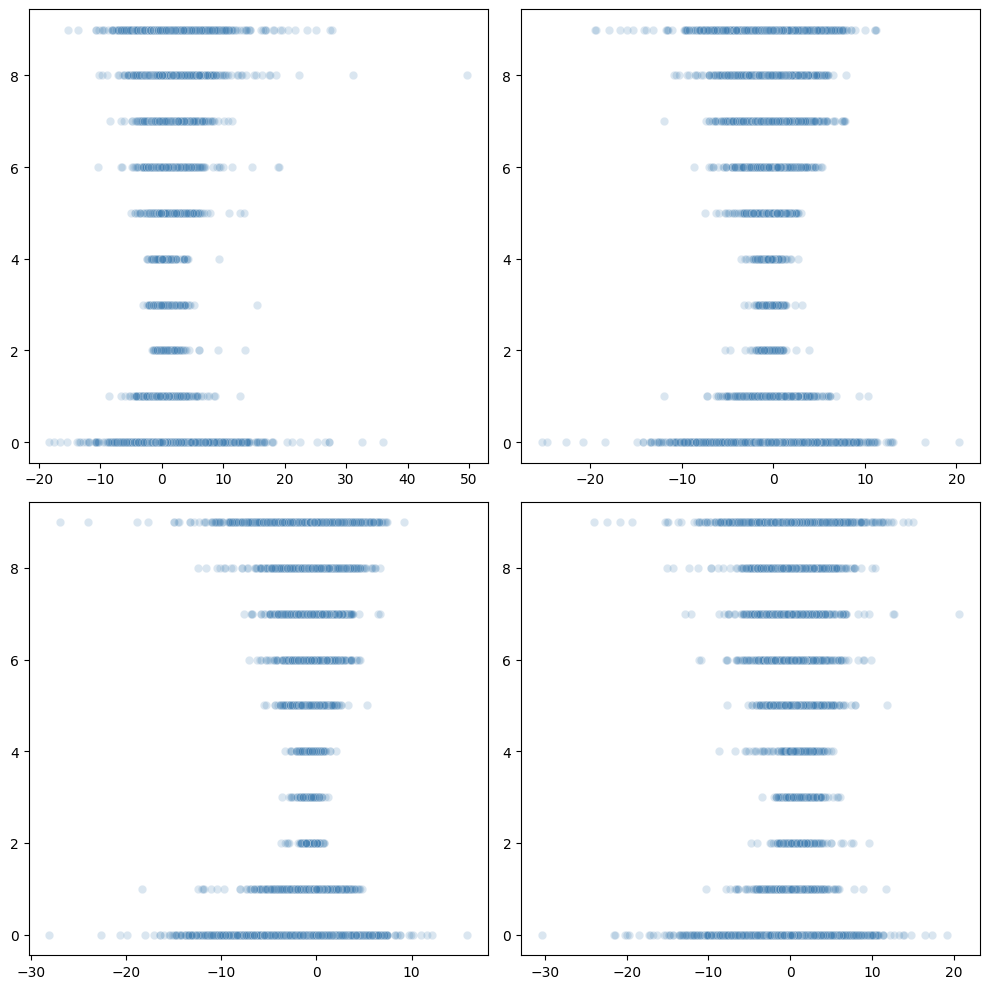

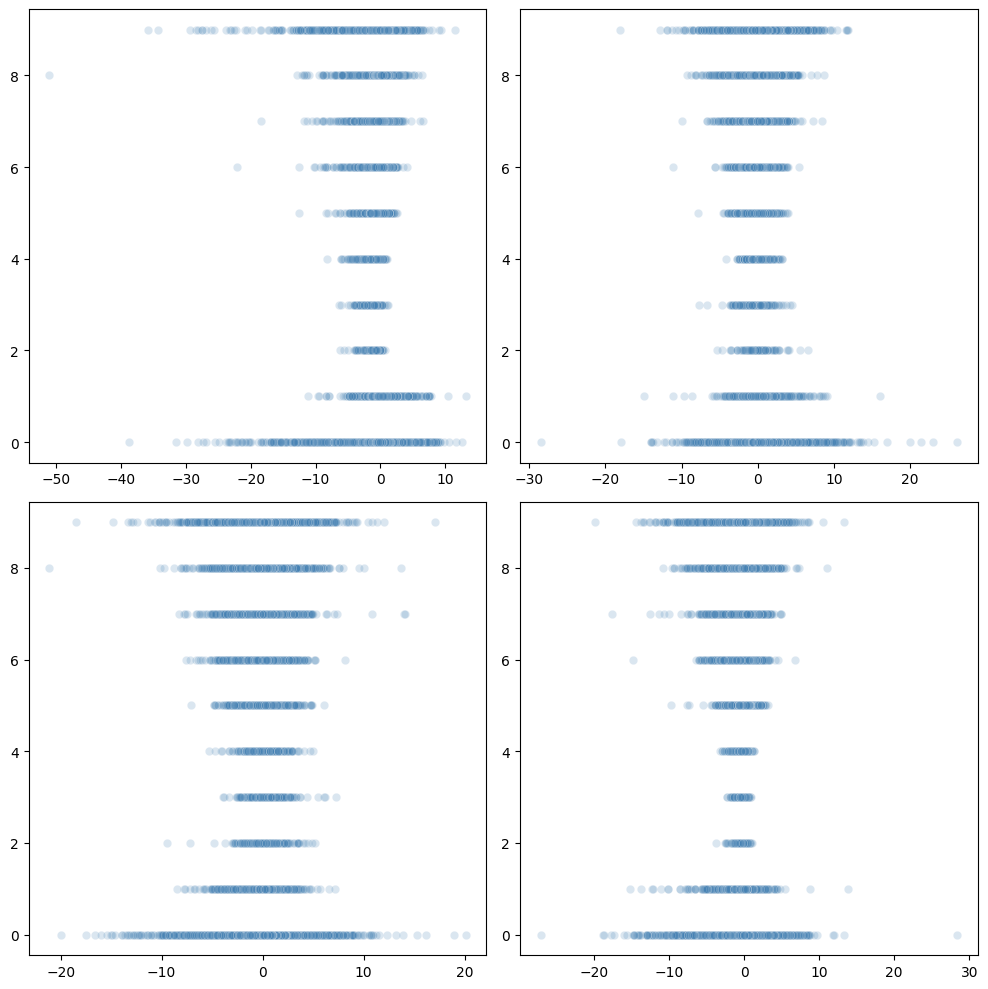

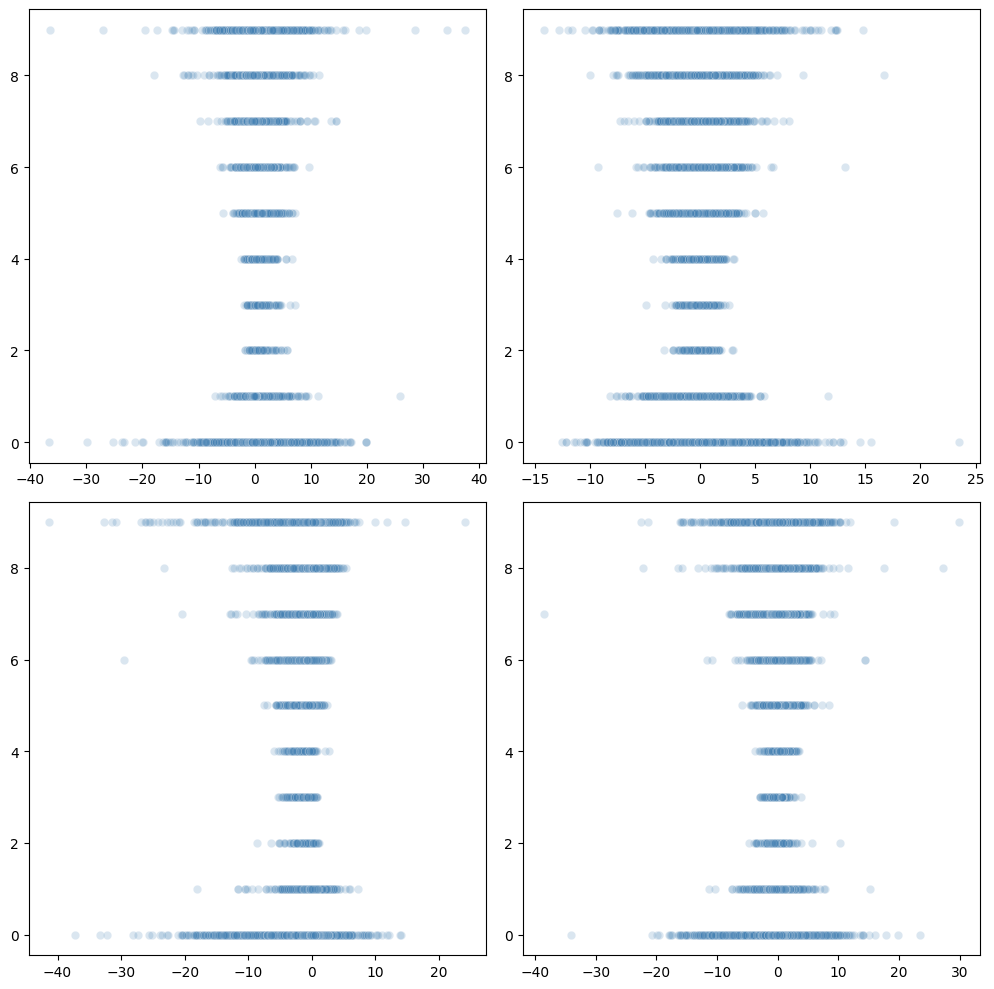

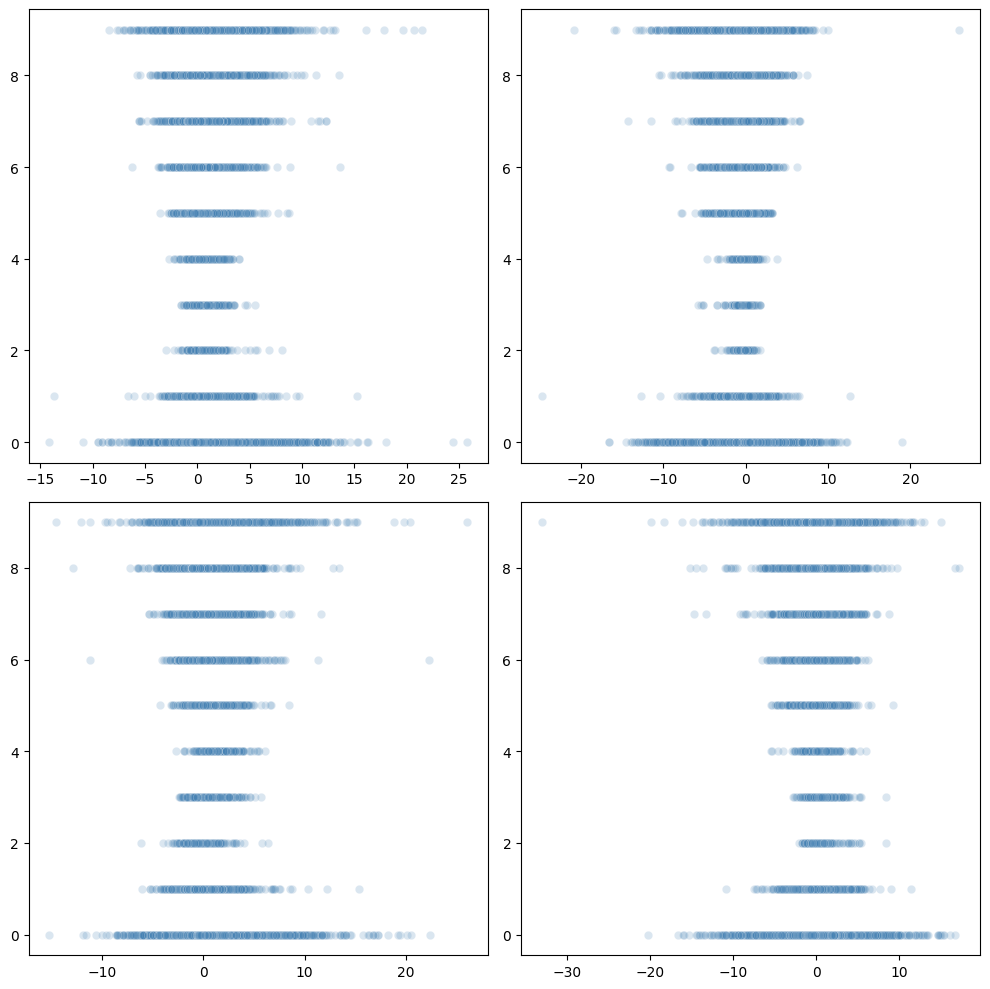

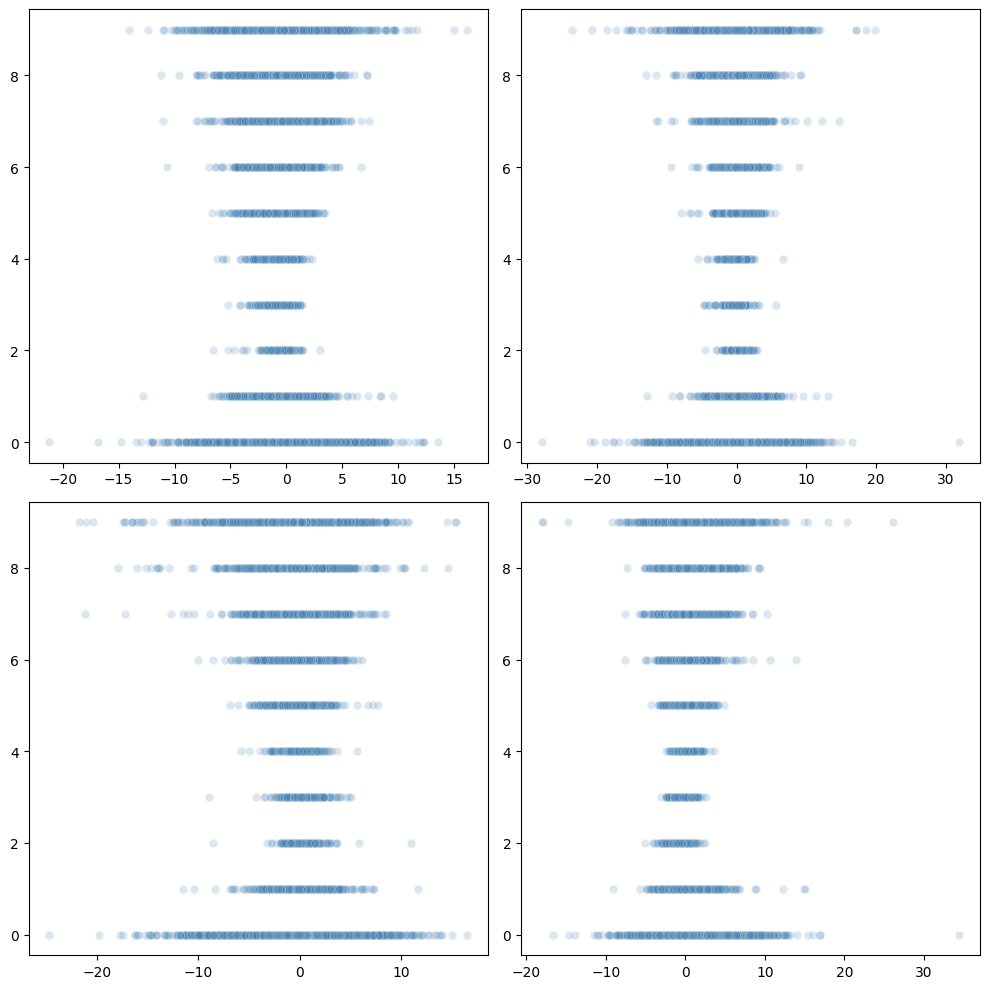

IndexError: index 90 is out of bounds for axis 0 with size 90

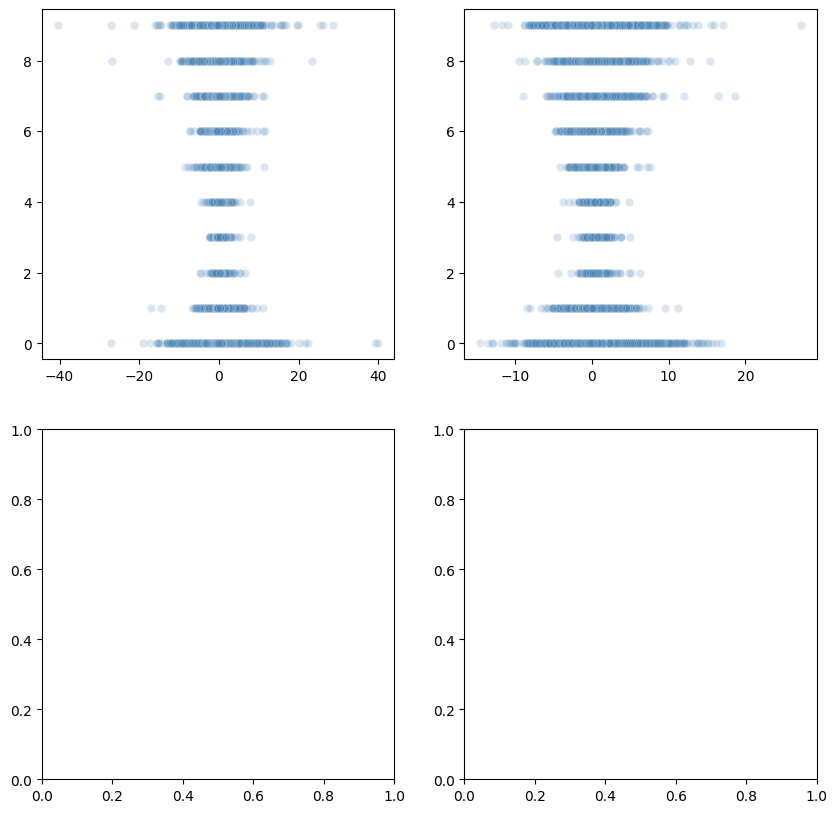

In [27]:
i = 0
while i<len(X_train[0]):
    plot_target_dependance(X_train, decade, start=i, end=i+3)
    i+=4

In [54]:
full = np.hstack((X_train, decade.reshape(len(decade),1)))
decade_correlation = np.corrcoef(x = full, rowvar = False)[len(cov_mat)-1]
decade_correlation = np.sort(decade_correlation)
decade_correlation

array([-0.19806966, -0.10513787, -0.09285208, -0.08703734, -0.07783672,
       -0.06993295, -0.06820423, -0.06814361, -0.06702815, -0.06038588,
       -0.05797792, -0.05238515, -0.0495364 , -0.04925676, -0.04582248,
       -0.04560003, -0.04066988, -0.03991005, -0.03684516, -0.03672289,
       -0.03420022, -0.03212211, -0.03193609, -0.03163797, -0.03093403,
       -0.02843714, -0.02768286, -0.02610159, -0.0216961 , -0.02059763,
       -0.01447163, -0.01409997, -0.01390188, -0.01282373, -0.01188558,
       -0.00680923, -0.00455435, -0.00390278, -0.00301627, -0.00298982,
       -0.00168034, -0.00146684,  0.0019139 ,  0.00321965,  0.0044504 ,
        0.00608461,  0.00643313,  0.00774505,  0.01129541,  0.01186328,
        0.01276005,  0.015501  ,  0.01643458,  0.01977648,  0.02313664,
        0.02363953,  0.02376243,  0.02700631,  0.02705041,  0.02725583,
        0.02854614,  0.03511326,  0.03612697,  0.03931265,  0.04072306,
        0.04124613,  0.04243595,  0.04834766,  0.05120107,  0.05

# Clean + Scale

# Upsampling

# Dimensionality Reduction + Feature Importance

# Prediction

# Test